In [1]:
# !pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data into variable using Pandas
data_df = pd.read_csv('../Data/DemoLRDS2.csv')

In [3]:
#First Look at Dataset
data_df.head()

,Customer Name,Order,Diamond,Gold,Rating
0,A,50,0,50,3
1,B,42,25,30,3
2,C,45,30,100,3
3,D,100,55,600,5
4,E,9000,500,1000,9


In [4]:
#All Features
list(data_df.columns)

['Customer Name', 'Order', 'Diamond', 'Gold', 'Rating']

In [5]:
#Target Attribute
data_df['Rating'].head()

0    3
1    3
2    3
3    5
4    9
Name: Rating, dtype: int64

In [7]:
#checking for null values in whole dataset
data_df.isnull().sum()

#there is no null values found in this dataset
#uncomment respectively if you add an extra to check the validity of project

#data_df.fillna(method ='pad') 
#data_df.fillna(method ='bfill')
#data_df.interpolate(method ='linear', limit_direction ='forward')
#data_df.dropna(axis = 0, how ='any')

#data_df.isnull()


Customer Name    0
Order            0
Diamond          0
Gold             0
Rating           0
dtype: int64

<Axes: >

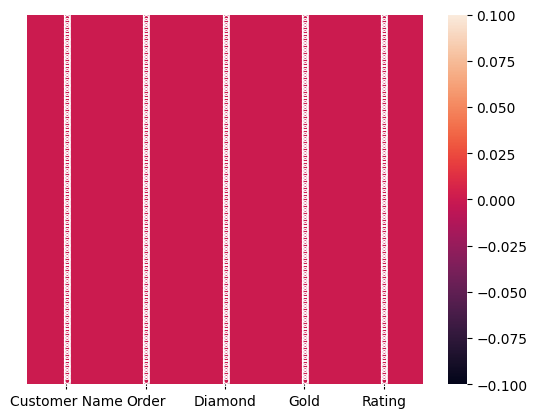

In [8]:
#heatmap of data proving there is no null values
sns.heatmap(data_df.isnull(),yticklabels=False, annot=True)

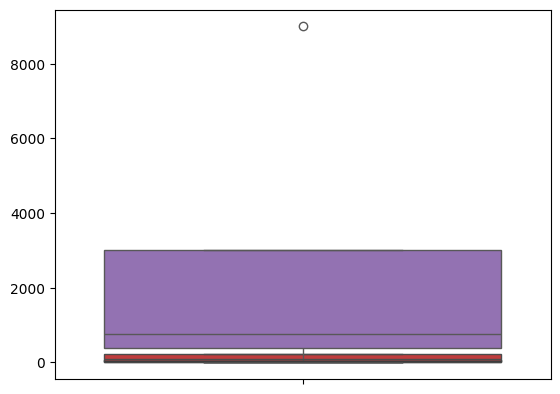

In [9]:
#Outlier detection
temp = data_df.drop(['Customer Name'],axis = 1)

#Our data's main label is country rather than the year. So we need to detect outlier row wise instead of column wise
for ind,row in temp.head().iterrows():
  sns.boxplot(row.tolist())

#NOTE: If you get the futureWarning error it is because there is no label given. However as we can see in the graph there is no outlier

In [ ]:
#Preparing the data to get splitted
x = data_df.drop(['Rating'], axis = 1)
y = data_df['Rating']
xx = x.drop(['Customer Name'], axis = 1)

#splitting into train and test
#best output was obtained for 30-70 split with no randomization 
from sklearn.model_selection import train_test_split
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(x,y,test_size = 0.3, random_state = 1)

#saving country names in different variables
test_customers = x_test_temp['Customer Name']
train_customers = x_train_temp['Customer Name']
name = data_df['Customer Name']


#Preparing the Splitted data to load in Model
x_train = x_train_temp.drop(['Customer Name'], axis = 1)
y_train = y_train_temp
x_test = x_test_temp.drop(['Customer Name'], axis = 1)
y_test = y_test_temp

In [11]:
#run SVR
from sklearn.svm import SVR

ModelSVR = SVR(kernel = 'rbf')
ModelSVR.fit(x_train, y_train)

SVR()

In [12]:
#Storing the prediction in variable

y_predSVR = ModelSVR.predict(x_test)
y_predSVR

array([4.27344169, 3.85851462, 3.69656224, 3.68454092, 3.82025362,
       3.9767865 , 3.89970315, 4.57618953, 3.72188317, 4.29699961,
       7.63427996, 4.1097476 , 3.79544865, 4.18193321, 3.75391994,
       3.73393736, 3.81209709, 5.09907659, 3.73539294, 4.00651236,
       3.8917302 , 4.78678011, 3.77105164, 3.98735645, 3.82208333,
       6.97892437, 3.68736641, 4.36370996, 3.79301977, 3.74096954,
       4.02186039, 3.81311475])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

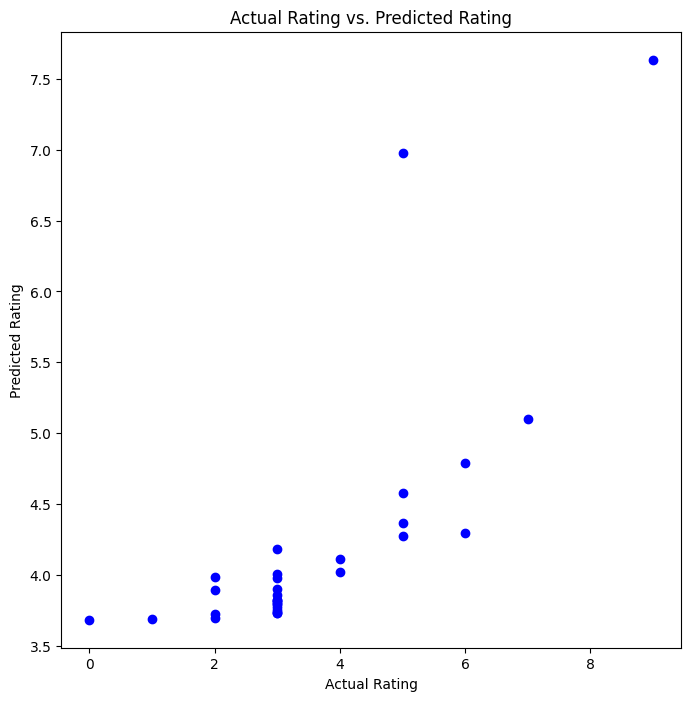

In [13]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predSVR, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

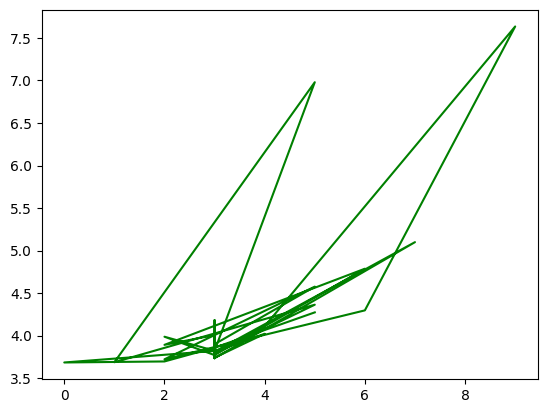

In [14]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predSVR ,'g-')

In [15]:
#Now as we can see in graph we have obtained best results!
#So our accuracy will be better than Gamma Regressor

In [19]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_SVR = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predSVR, 'Difference': y_test-y_predSVR})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_SVR.to_csv('../Output/LRDS2_Comparision_Table.csv')
pred_y_df_SVR.head()

,Customer Name,Actual Value,predicted value,Difference
96,SSSS,5,4.273442,0.726558
35,JJ,3,3.858515,-0.858515
81,DDDD,2,3.696562,-1.696562
59,HHH,0,3.684541,-3.684541
38,MM,3,3.820254,-0.820254


In [20]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predSVR))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predSVR)))

Accuracy:  0.3675644498106899
Mean Sqaure Root Error:  1.3772033392807137
